In [150]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence, style_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
file = open("../data/delaunay/torus_eigenvalues/torus_eigenvalues.pkl", "rb")
torus_eigenvalues = pickle.load(file)
file.close()

file = open("../data/delaunay/sphere_eigenvalues/sphere_eigenvalues.pkl", "rb")
sphere_eigenvalues = pickle.load(file)
file.close()

file = open("../data/delaunay/drum_eigenvalues/drum_eigenvalues.pkl", "rb")
drum_eigenvalues = pickle.load(file)
file.close()

file = open("../data/delaunay/coefficients/delaunay_coefficients_cg.pkl", "rb")
coefficients = pickle.load(file)
file.close()

In [152]:
torus_nums_Vs = np.sort(list(torus_eigenvalues.keys()))
sphere_nums_Vs = np.sort(list(sphere_eigenvalues.keys()))
drum_nums_Vs = np.sort(list(drum_eigenvalues.keys()))
coefficients_nums_Vs = np.sort(list(coefficients.keys()))

torus_means = []
for num_Vs in torus_nums_Vs:
    torus_means.append(np.mean(list(torus_eigenvalues[num_Vs].values())))
torus_means = np.array(torus_means)

sphere_means = []
for num_Vs in sphere_nums_Vs:
    sphere_means.append(np.mean(list(sphere_eigenvalues[num_Vs].values())))
sphere_means = np.array(sphere_means)

drum_means = []
for num_Vs in drum_nums_Vs:
    drum_means.append(np.mean(list(drum_eigenvalues[num_Vs].values())))
drum_means = np.array(drum_means)

coefficients_means = []
for num_Vs in coefficients_nums_Vs:
    coefficients_means.append(np.mean(coefficients[num_Vs]))
coefficients_means = np.array(coefficients_means)

In [7]:
coefficients_means

array([0.90916311, 0.91123221, 0.91346896, 0.91431723, 0.91630329,
       0.9171291 , 0.91818848, 0.91832123, 0.91899282, 0.91914927,
       0.9193943 , 0.92003103, 0.9198012 , 0.92003262, 0.92012452])

In [5]:
richardson_extrapolated_value = ((coefficients_nums_Vs[-1]**(-1.) * coefficients_means[-2] - coefficients_nums_Vs[-2]**(-1.) * coefficients_means[-1]) 
                                 / (coefficients_nums_Vs[-1]**(-1.) - coefficients_nums_Vs[-2]**(-1.)))

print(richardson_extrapolated_value)

torus_continuum_eigenvalue = richardson_extrapolated_value * 4 * np.pi**2 / 2
sphere_continuum_eigenvalue = richardson_extrapolated_value * (1 * (1 + 1) / 2)
drum_continuum_eigenvalue = richardson_extrapolated_value * (scipy.special.jn_zeros(0, 1)[0]**2 / 2)

0.9201853054530903


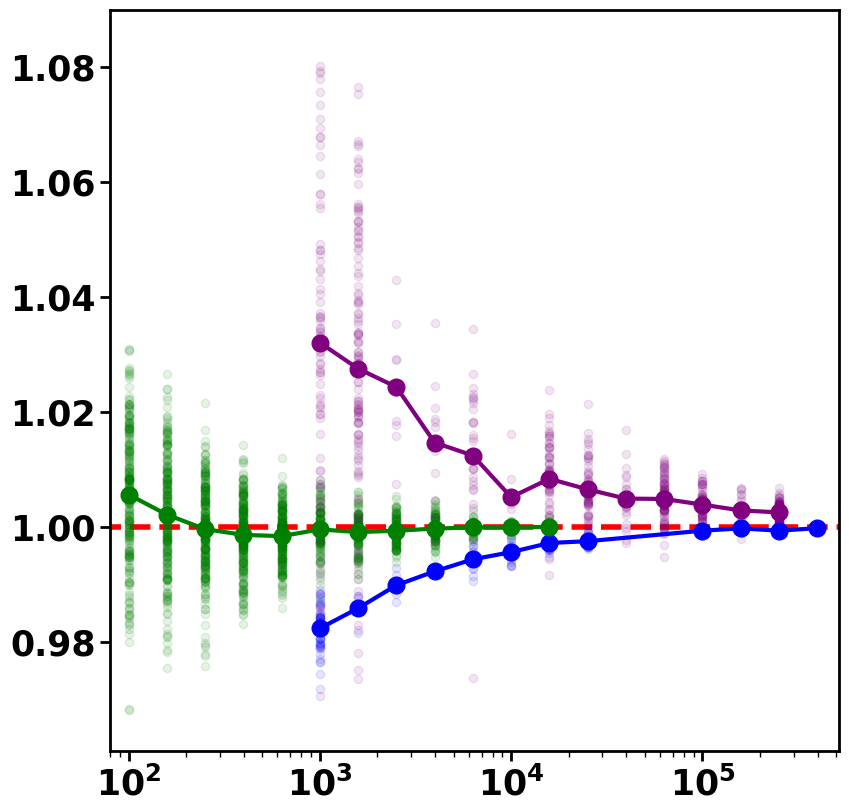

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12
ax.plot(torus_nums_Vs, torus_means**2 / torus_continuum_eigenvalue, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.plot(sphere_nums_Vs, sphere_means**2 / sphere_continuum_eigenvalue, 'o-', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.plot(drum_nums_Vs, drum_means**2 / drum_continuum_eigenvalue, 'o-', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.set_xscale('log')
ax.hlines(y=1., xmin=50, xmax=1500000, color='r', linestyle='--', linewidth=4, zorder=0)

for num_Vs in torus_nums_Vs:
    y = np.mean(list(torus_eigenvalues[num_Vs].values()), axis=1)**2 / torus_continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='b', zorder=0, alpha=0.1)
for num_Vs in sphere_nums_Vs:
    y = np.mean(list(sphere_eigenvalues[num_Vs].values()), axis=1)**2 / sphere_continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='g', zorder=0, alpha=0.1)
for num_Vs in drum_nums_Vs:
    y = np.mean(list(drum_eigenvalues[num_Vs].values()), axis=1)**2 / drum_continuum_eigenvalue
    x = np.ones(len(y)) * num_Vs
    ax.scatter(x, y, c='purple', zorder=0, alpha=0.1)

ax.set_xlim([80, 520000])

style_plot(fig, ax, aspect=None)

ax.set_ylim([0.961, 1.09])

plt.savefig("../figures/delaunay/eigenvalue_raw_plot.png", dpi=300, bbox_inches="tight")

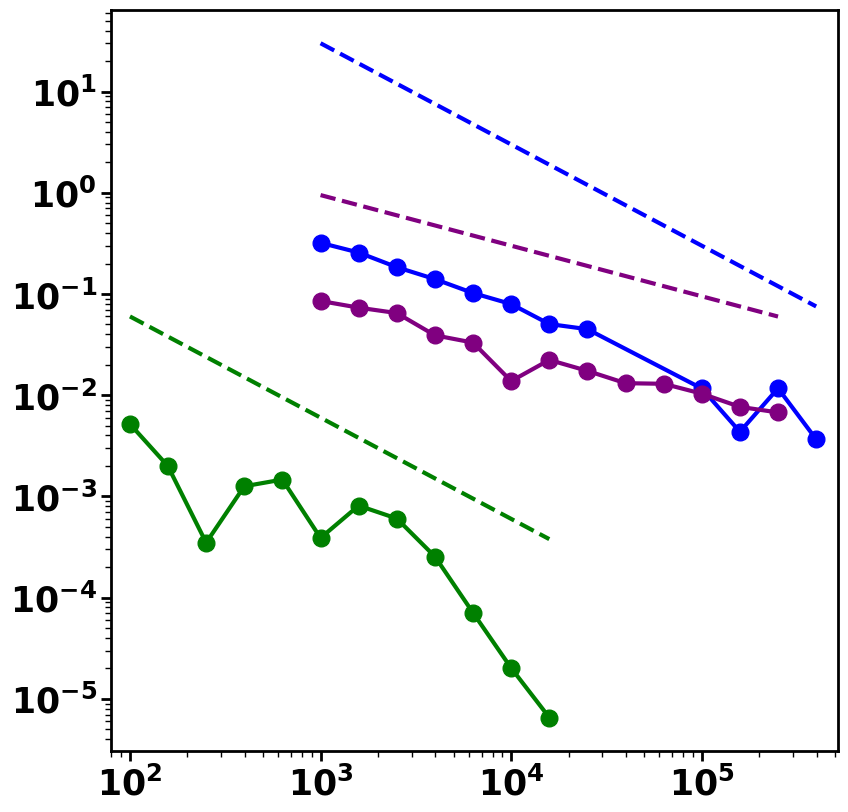

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

torus_end = None
sphere_end = None
drum_end = None

ax.loglog(torus_nums_Vs[:torus_end], np.abs((torus_means[:torus_end]**2 - torus_continuum_eigenvalue)), 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(sphere_nums_Vs[:sphere_end], np.abs((sphere_means[:sphere_end]**2 - sphere_continuum_eigenvalue)), 
          'o-', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(drum_nums_Vs[:drum_end], np.abs((drum_means[:drum_end]**2 - drum_continuum_eigenvalue)), 
          'o-', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(torus_nums_Vs[:torus_end], torus_nums_Vs[:torus_end]**(-1.) * 30000, 
          '--', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(sphere_nums_Vs[:sphere_end], sphere_nums_Vs[:sphere_end]**(-1.) * 6, 
          '--', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(drum_nums_Vs[:drum_end], drum_nums_Vs[:drum_end]**(-0.5) * 30, 
          '--', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.set_xlim([80, 520000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([1.1e-5, 9.9e1])

# plt.savefig("../figures/delaunay/eigenvalue_convergence_plot.png", dpi=300, bbox_inches="tight")

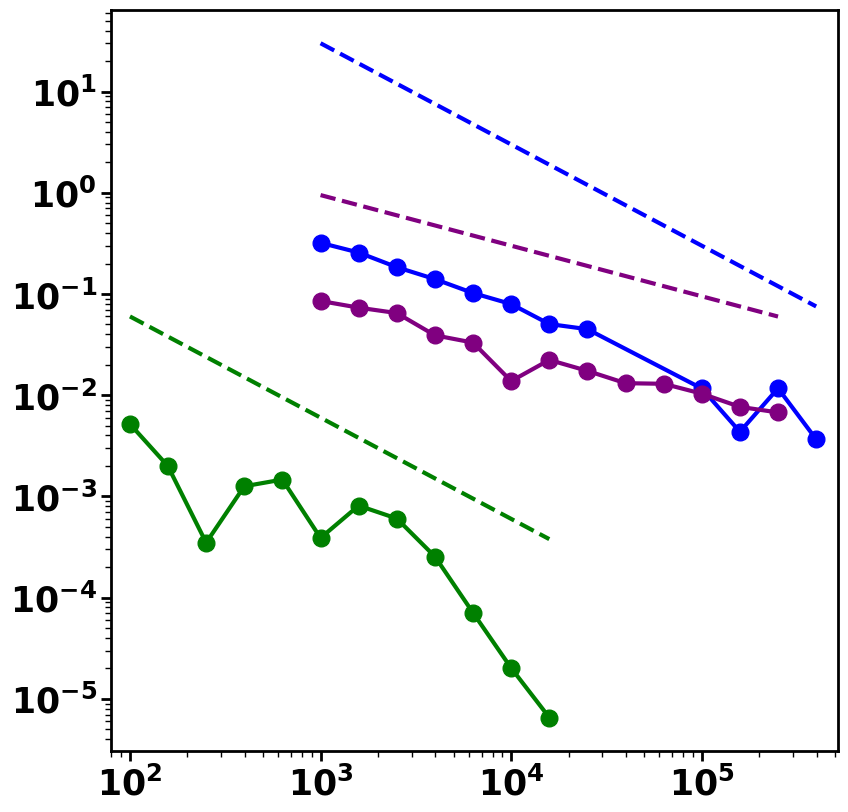

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

torus_end = None
sphere_end = None
drum_end = None

ax.loglog(torus_nums_Vs[:torus_end], np.abs((torus_means[:torus_end]**2 - torus_continuum_eigenvalue)), 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(sphere_nums_Vs[:sphere_end], np.abs((sphere_means[:sphere_end]**2 - sphere_continuum_eigenvalue)), 
          'o-', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)
ax.loglog(drum_nums_Vs[:drum_end], np.abs((drum_means[:drum_end]**2 - drum_continuum_eigenvalue)), 
          'o-', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(torus_nums_Vs[:torus_end], torus_nums_Vs[:torus_end]**(-1.) * 30000, 
          '--', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(sphere_nums_Vs[:sphere_end], sphere_nums_Vs[:sphere_end]**(-1.) * 6, 
          '--', c='g', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(drum_nums_Vs[:drum_end], drum_nums_Vs[:drum_end]**(-0.5) * 30, 
          '--', c='purple', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.set_xlim([80, 520000])

style_plot(fig, ax, aspect=None)

# ax.set_ylim([1.1e-5, 9.9e1])

plt.savefig("../figures/delaunay/eigenvalue_convergence_plot.png", dpi=300, bbox_inches="tight")

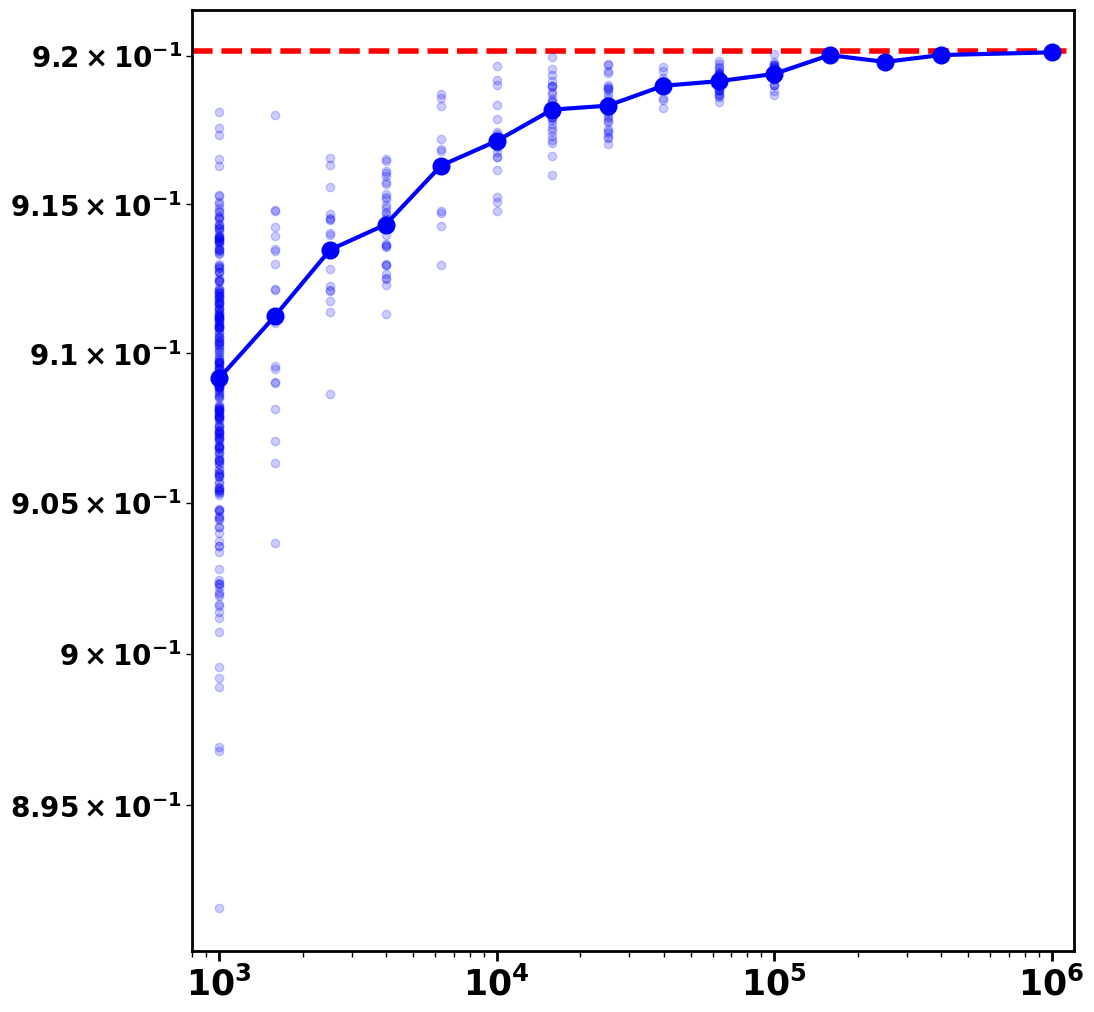

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 12

ax.loglog(coefficients_nums_Vs, coefficients_means, 
          'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

for num_Vs in coefficients:
    ax.scatter(np.ones(len(coefficients[num_Vs])) * num_Vs, coefficients[num_Vs], c='b', alpha=0.2)

ax.set_xlim([800, 1200000])

style_plot(fig, ax, aspect=None)

ax.hlines(y=richardson_extrapolated_value, xmin=800, xmax=1500000, color='r', linestyle='--', linewidth=4, zorder=0)

plt.savefig("../figures/delaunay/coefficient_plot.png", dpi=300, bbox_inches="tight")

In [20]:
cauchy_nums_Vs = np.array([np.abs(coefficients_nums_Vs[i] - coefficients_nums_Vs[i + 1]) for i in range(len(coefficients_nums_Vs) - 1)])
cauchy_coefficients_means = np.array([np.abs(coefficients_means[i] - coefficients_means[i + 1]) for i in range(len(coefficients_means) - 1)])
coefficients_vars = []
for num_Vs in coefficients_nums_Vs:
    coefficients_vars.append(np.std(coefficients[num_Vs]))
coefficients_vars = np.array(coefficients_vars)
 
cauchy_coefficients_vars = np.array([np.abs(coefficients_vars[i] - coefficients_vars[i + 1]) for i in range(len(coefficients_vars) - 1)])

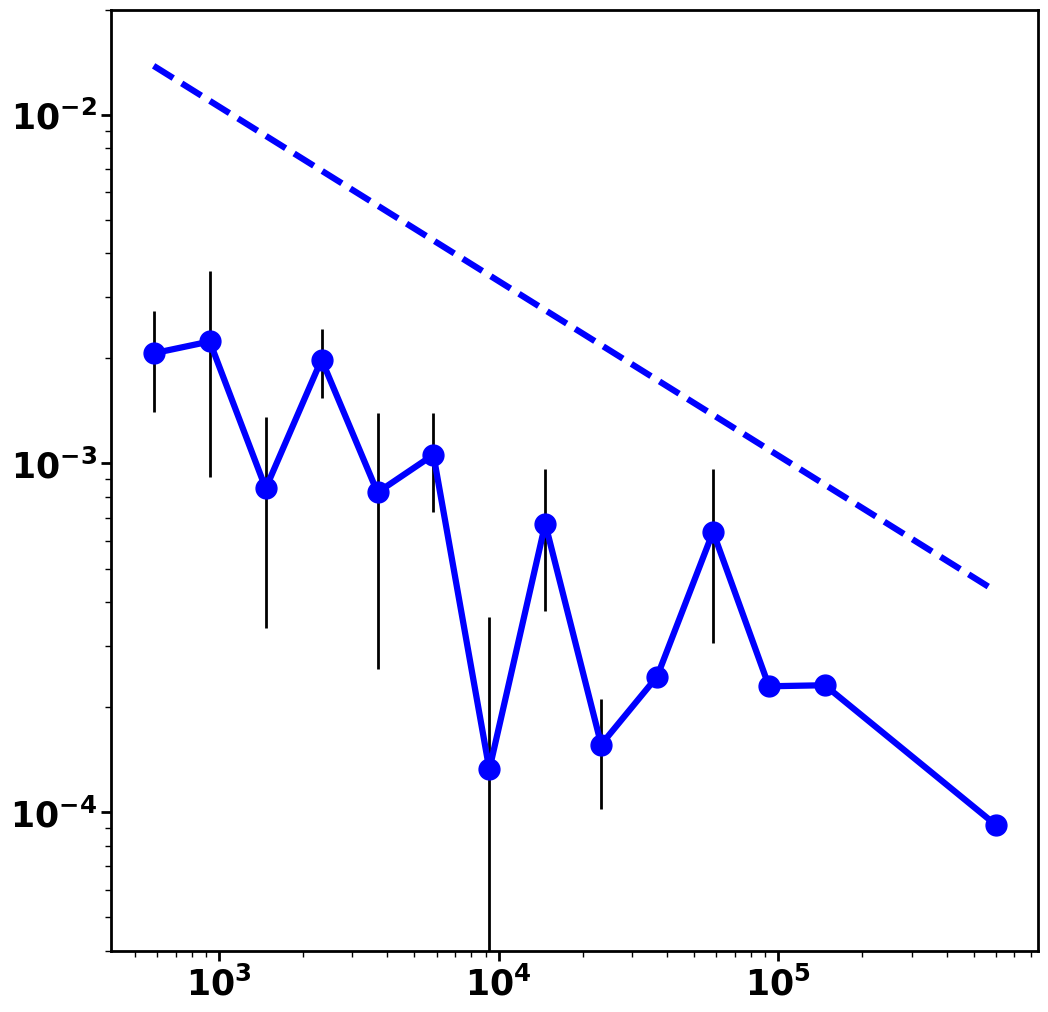

In [148]:
x = cauchy_nums_Vs.copy()
y = cauchy_coefficients_means.copy()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 4.5
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[cauchy_coefficients_vars, cauchy_coefficients_vars], fmt='o-', 
            c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize, elinewidth=2, ecolor='black')

ax.set_xscale('log')
ax.set_yscale('log')

ax.loglog(x, x**(-0.5) * 1 / 3, '--', c='b', linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

ax.set_ylim(4e-5, 2e-2)

# plt.savefig("../figures/delaunay/coefficient_cauchy_convergence_plot.png", dpi=300, bbox_inches="tight")

plt.show()
